In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\Acer\Desktop\Dataset\diabetes_dataset.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [8]:
from imblearn.over_sampling  import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [9]:
from collections import Counter
print("The Original data :",Counter(y))
print("The Aritificial data : ",Counter(y_data))

The Original data : Counter({0: 500, 1: 268})
The Aritificial data :  Counter({1: 500, 0: 500})


In [10]:
# from sklearn.model_selection import StartifiedKFold
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=4,random_state=10,shuffle=True)
skf.get_n_splits(x_data,y_data)
print(skf)

StratifiedKFold(n_splits=4, random_state=10, shuffle=True)


In [11]:
for train_index,test_index in skf.split(x_data,y_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    

TRAIN: [  0   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18  19
  21  22  23  24  29  30  31  32  34  35  36  37  38  39  40  41  42  43
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  61  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  91  92  93  94  95  96  98  99 101 102 103 104 105
 107 108 109 110 112 113 114 116 117 119 121 122 123 125 127 130 131 132
 134 135 136 137 139 140 141 143 145 146 147 150 151 152 153 154 156 158
 159 160 161 163 165 166 167 168 169 172 173 174 177 178 179 181 182 183
 184 185 186 187 188 189 190 192 193 194 195 196 198 200 201 202 203 204
 206 207 209 210 212 213 214 215 216 217 219 220 222 223 224 225 227 228
 229 232 233 234 236 237 238 239 240 241 242 243 244 246 247 248 249 253
 254 256 258 261 262 263 264 265 268 269 270 271 272 274 275 276 277 278
 279 280 281 282 283 284 285 287 288 290 292 293 294 295 296 297 298 299
 300 301 302 304 305 306 307 308 309 311 312

[0.66489362 0.71276596 0.68983957 0.77005348]
70.93881556491068


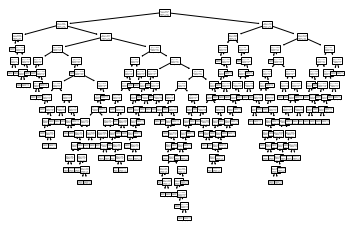

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier=classifier.fit(x_data,y_data)
tree.plot_tree(classifier)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train,y_train, cv=skf)
print(scores)
print(np.mean(scores)*100)

In [13]:
from sklearn.model_selection import cross_val_predict
y1_pred=cross_val_predict(classifier,x_test,y_test,cv=skf)
y1_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac1 = accuracy_score(y_test,y1_pred)*100
cm1 = confusion_matrix(y_test,y1_pred)
print("accuracy score : ",ac1)
print("confusion matrix :")
print(cm1)

accuracy score :  71.6
confusion matrix :
[[84 41]
 [30 95]]
